# Day 12: Passage Pathing

In [1]:
import heapq
from collections import defaultdict


def load_input(filename):
    caves = defaultdict(list)
    with open(filename) as f:
        for line in f.readlines():
            a, b = line.strip().split('-')
            heapq.heappush(caves[a], b)
            heapq.heappush(caves[b], a)
    return caves

In [2]:
sample = load_input('12-sample.txt')
sample

defaultdict(list,
            {'start': ['A', 'b'],
             'A': ['b', 'end', 'c', 'start'],
             'b': ['A', 'end', 'd', 'start'],
             'c': ['A'],
             'd': ['b'],
             'end': ['A', 'b']})

In [3]:
def is_small_cave(s):
    return s == s.lower()


def is_big_cave(s):
    return s != s.lower()


def find_paths(caves):
    stack = [('start',)]
    counter = 0
    while stack:
        counter += 1
        if counter > 300000:
            print("Breaks in counter")
            print("Size of stack:", len(stack))
            break
        path = stack.pop()
        *tail, head = path
        for next_cave in caves[head]:
            new_path  = (*path, next_cave)
            if next_cave == 'end':
                yield new_path
            elif is_big_cave(next_cave) or new_path.count(next_cave) == 1:
                stack.append(new_path)

def print_path(path):
    print(','.join(path))

Given these rules, there are 10 paths through this example cave system:

```
start,A,b,A,c,A,end
start,A,b,A,end
start,A,b,end
start,A,c,A,b,A,end
start,A,c,A,b,end
start,A,c,A,end
start,A,end
start,b,A,c,A,end
start,b,A,end
start,b,end
```

In [4]:
caves = load_input('12-sample.txt')
for path in find_paths(caves):
    print_path(path)

start,b,end
start,b,A,end
start,b,A,c,A,end
start,A,end
start,A,c,A,end
start,A,c,A,b,end
start,A,c,A,b,A,end
start,A,b,end
start,A,b,A,end
start,A,b,A,c,A,end


### Sample 2


In [5]:
caves = load_input('12-sample-2.txt')
counter = 0
for path in find_paths(caves):
    print_path(path)
    counter += 1
assert counter == 19

start,dc,end
start,dc,kj,HN,end
start,dc,HN,end
start,dc,HN,kj,HN,end
start,kj,dc,end
start,kj,dc,HN,end
start,kj,HN,end
start,kj,HN,dc,end
start,kj,HN,dc,HN,end
start,HN,end
start,HN,kj,dc,end
start,HN,kj,dc,HN,end
start,HN,kj,HN,end
start,HN,kj,HN,dc,end
start,HN,kj,HN,dc,HN,end
start,HN,dc,end
start,HN,dc,kj,HN,end
start,HN,dc,HN,end
start,HN,dc,HN,kj,HN,end


### Sample 3

In [6]:
caves = load_input('12-sample-3.txt')
assert len(list(find_paths(caves))) == 226

### Solution part one

In [7]:
caves = load_input('12-input.txt')
sol = len(set(list(find_paths(caves))))
print(f"Solutions for part one: {sol}")

Solutions for part one: 3713


## Part two

In [8]:
def no_more_than_two_small_caves(path):
    if path.count('start') > 1:
        return False
    if path.count('end') > 1:
        return False
    small_caves = set([p for p in path if is_small_cave(p)])
    num_nodes = len(small_caves)
    counters = [path.count(p) for p in small_caves]
    return sum(counters) in (num_nodes, num_nodes+1)
                       
assert no_more_than_two_small_caves(['a', 'b', 'c']) is True
assert no_more_than_two_small_caves(['a', 'a', 'b', 'c']) is True  
assert no_more_than_two_small_caves(['a', 'b', 'b', 'c']) is True  
assert no_more_than_two_small_caves(['a', 'b', 'c', 'c']) is True  
assert no_more_than_two_small_caves(['a', 'b', 'c', 'c', 'c']) is False
assert no_more_than_two_small_caves(['a', 'a', 'BIG', 'b', 'c']) is True  
assert no_more_than_two_small_caves(['a', 'BIG', 'BIG', 'b', 'c']) is True  
assert no_more_than_two_small_caves(['a', 'a', 'BIG', 'BIG', 'b', 'c']) is True  
assert no_more_than_two_small_caves(['start','A','c','A','b', 'start', 'A', 'end']) is False

In [9]:
def find_paths_two(caves):
    stack = [('start',)]
    counter = 0
    while stack:
        counter += 1
        if counter > 300000:
            print("Breaks in counter")
            print("Size of stack:", len(stack))
            break
        path = stack.pop()
        *tail, head = path
        for next_cave in caves[head]:
            new_path  = (*path, next_cave)
            if next_cave == 'end':
                yield new_path
            elif is_big_cave(next_cave) or no_more_than_two_small_caves(new_path):
                stack.append(new_path)

In [10]:
caves = load_input('12-sample.txt')
assert len(list(find_paths_two(caves))) == 36

In [11]:
caves = load_input('12-sample-2.txt')
assert len(list(find_paths_two(caves))) == 103

In [12]:
caves = load_input('12-sample-3.txt')
assert len(list(find_paths_two(caves))) == 3509

In [13]:
caves = load_input('12-input.txt')
sol = len(list(find_paths_two(caves)))
print(f"Solution part two: {sol}")

Solution part two: 91292


## Extra

### Warning: Next steps requires having pydot installed

**pydot** is an interface to Graphviz that can parse and dump into the DOT language used by GraphViz, and is written in pure Python.

- [https://pypi.org/project/pydot/](https://pypi.org/project/pydot/)

### Initial and Final States

The **initial state** of a state machine diagram, known as an initial pseudo-state, is indicated with a solid circle. A transition from this state will show the first real state

The **final state** of a state machine diagram is shown as concentric circles. An open loop state machine represents an object that may terminate before the system terminates, while a closed loop state machine diagram does not have a final state; if it is the case, then the object lives until the entire system terminates.

Source: [What is State Machine Diagrams?](https://www.visual-paradigm.com/guide/uml-unified-modeling-language/what-is-state-machine-diagram/)

In [14]:
import pydot
from IPython.display import Image, display

def view_caves(caves):
    copy_caves = caves.copy()
    nodes = ' '.join(copy_caves.pop('start'))
    buff = [
        'graph my_graph {',
        ' { rank=min start [shape=circle fillcolor=black style=filled fontcolor=silver] };',
        ' { rank=sink end [shape=doublecircle color=black] };',
        f'  start -- {nodes};'
    ]
    visited = set(['start'])
    for k in copy_caves:
        nodes = ' '.join(n for n in copy_caves[k] if n not in visited)
        buff.append(f'  {k} -- {{ {nodes} }};')
        visited.add(k)
    buff.append("}")
    graph = pydot.graph_from_dot_data('\n'.join(buff))[0]                            
    return graph.create_png()

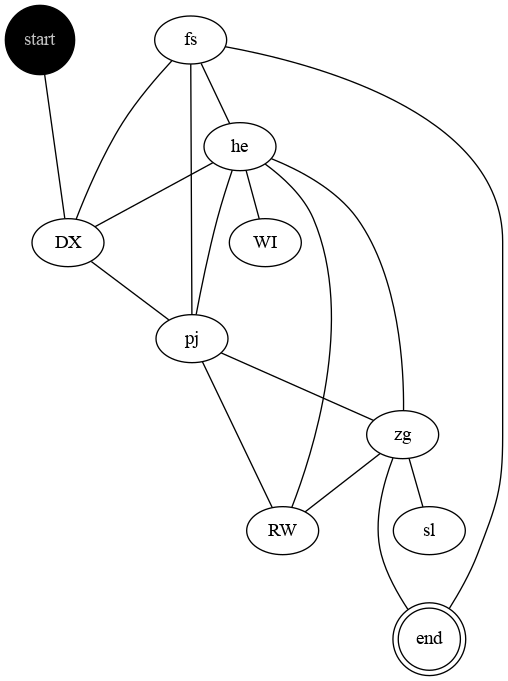

In [15]:
caves = load_input('12-sample-3.txt')
display(Image(view_caves(caves)))

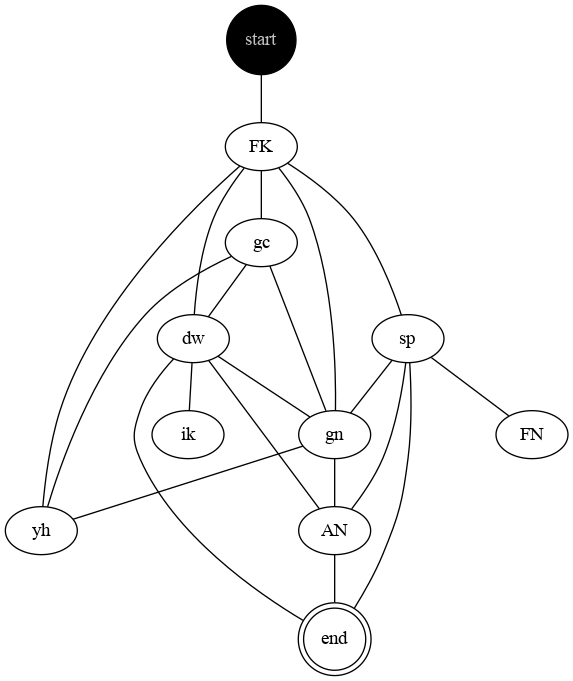

In [16]:
caves = load_input('12-input.txt')
display(Image(view_caves(caves)))

In [17]:
img = view_caves(caves)
with open('cave-maze.png', 'wb') as fw:
    fw.write(img)